# Ensemble: prra_siconc & prsn_siconc (over sea-ice)

## Imports & defaults

In [1]:
import libs.analysis
import libs.ensemble
import libs.plot
import libs.utils
import matplotlib

matplotlib.rcParams.update({ 'font.size': 18 })
#xarray.set_options(keep_attrs=True)

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [2]:
# ----- SPECIFIC SETTINGS -----
component = 'Amon'
experiment = 'ssp585'
#variable_id = 'prra'

time_series_text = 'rainfall (dashed) and snowfall (solid) over sea-ice'
time_series_weighted_method = 'mean'
time_series_units = 'mm day⁻¹'
time_series_y_label = f'Precipitation ({time_series_units})'
time_series_y_range = (0, 1)
time_series_y_range_monthly = (0, 2)
time_series_process = lambda x: x

def preprocess(var_data, experiment, source_id, variant_label):
    # Convert to s-1 => day-1
    var_data *= 86400

    return var_data

In [3]:
ensemble_prsn, weight_prsn = libs.ensemble.get_and_preprocess(
    component, 
    experiment, 
    'prsn_siconc',
    preprocess=preprocess
)

ensemble_prsn_time_series, ensemble_prsn_time_series_smooth = libs.ensemble.time_series_weighted(
    ensemble_prsn,
    weight_prsn,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)


prra_plot_kwargs = { 'linestyle': 'dashed' }
ensemble_prra, weight_prra = libs.ensemble.get_and_preprocess(
    component, 
    experiment, 
    'prra_siconc',
    preprocess=preprocess
)

ensemble_prra_time_series, ensemble_prra_time_series_smooth = libs.ensemble.time_series_weighted(
    ensemble_prra,
    weight_prra,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process,
    item_plot_kwargs=prra_plot_kwargs
)

# Generate slices
ensemble_prsn_time_slices = libs.analysis.generate_slices(ensemble_prsn)
ensemble_prra_time_slices = libs.analysis.generate_slices(ensemble_prra, item_plot_kwargs=prra_plot_kwargs)

del ensemble_prsn_time_series
del ensemble_prra_time_series

## Time series

### Mean

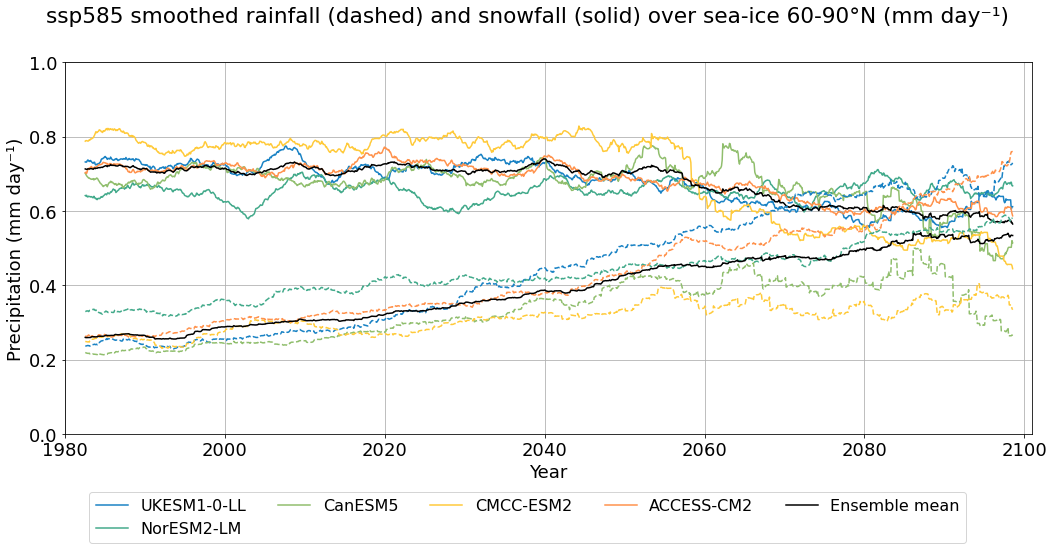

In [4]:
libs.plot.time_series(
    [
        *ensemble_prsn_time_series_smooth,
        *ensemble_prra_time_series_smooth
    ],
    title=f'{experiment} smoothed {time_series_text} 60-90°N ({time_series_units})',
    xattr='time',
    ylabel=time_series_y_label,
    yrange=time_series_y_range
)

## Monthly variability

### Full region (time)

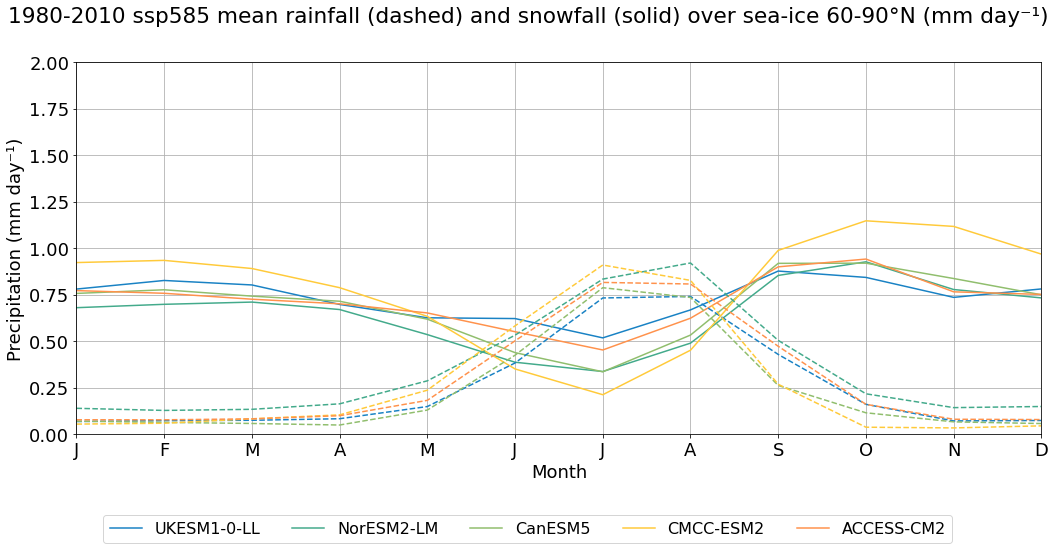

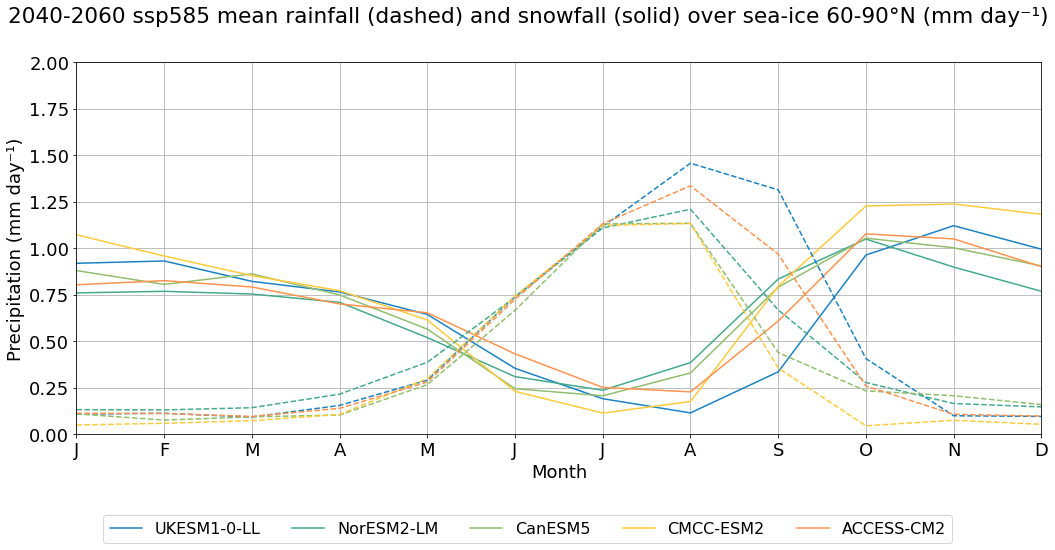

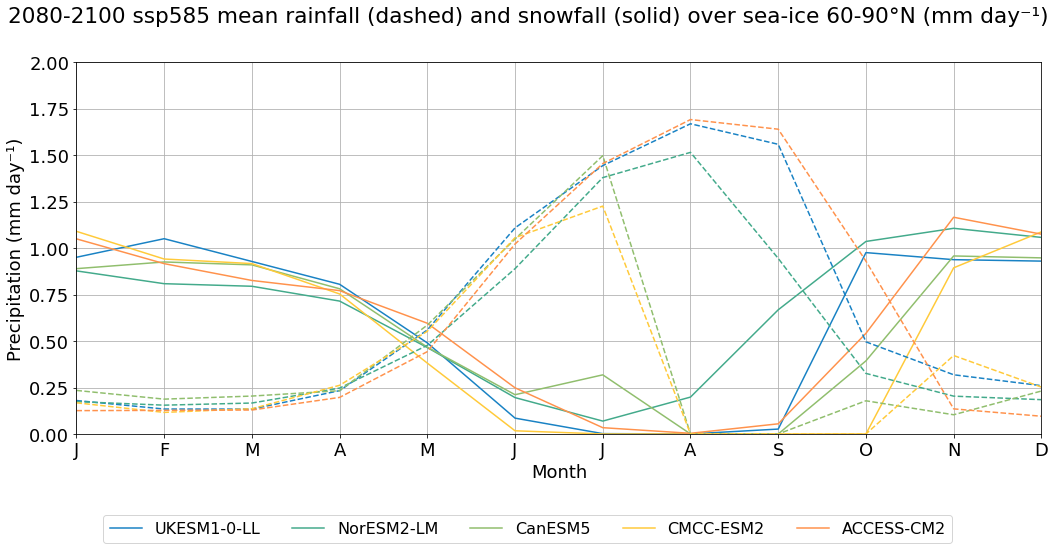

In [5]:
ensemble_time_slices = []
for i, s in enumerate(ensemble_prsn_time_slices):
    for item in ensemble_prra_time_slices[i]['ensemble']:
        s['ensemble'].append(item)
    
    ensemble_time_slices.append(s)


libs.ensemble.monthly_variability_full(
    ensemble_time_slices,
    calc_ensemble_mean=False,
    plot_kwargs={
        'title': f'{{s_label}} {experiment} mean {time_series_text} 60-90°N ({time_series_units})',
        'ylabel': time_series_y_label,
        'yrange': time_series_y_range_monthly
    },
    weight=weight_prsn,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)